# <center>Análise da temporada regular 23-24 do Indiana Pacers</center>

O objetivo principal deste projeto é analisar as estatísticas da temporada regular 2023-2024 da franquia Indiana Pacers, pertencente a National Basketball Association (NBA). O estudo busca entender quem são seus melhores jogadores e quais os pontos fortes e eventuais fraquezas, que os levaram a ter uma campanha de 47 vitórias e 35 derrotas, além de chegar às finais da conferência Leste. Para isto, será feita uma análise descritiva de diversas estatísticas individuais e coletivas que fornecerão insights valiosos que explicarão o sucesso do time.

<h2> <center>Dados

Para esta análise serão utilizados dois datasets, um com as estatísticas de todos os jogadores que jogaram alguma partida da NBA na temporada 23-24 e um com as estatísticas coletivas de todas as temporadas da NBA.

In [26]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from plot import *

In [2]:
#Carregandos os datasets
df_players = pd.read_csv("Nba-player-data(in).csv") #Dataframe com as estatísticas dos jogadores
df_teams = pd.read_csv("all_season_datenbank.csv") #Dataframe com as estatísticas dos times

In [3]:
#Visualização das 5 primeiras e últimas linhas do dataframe dos jogadores
df_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
732,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
733,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
734,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [4]:
#Visualização das 5 primeiras e últimas linhas do dataframe dos times
df_teams

,Unnamed: 0,season,team,FG,FGA,FG%,3P,3PA,3P%,2P,...,OORB,ODRB,OTRB,OAST,OSTL,OBLK,OTOV,OPF,OPTS,champion
0,0,2024,Indiana Pacers,47.0,92.7,0.507,13.2,35.3,0.374,33.8,...,11.0,32.4,43.4,24.6,6.6,5.4,13.9,18.3,120.2,NaN
1,1,2024,Boston Celtics,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2,NaN
2,2,2024,Oklahoma City Thunder,44.5,89.3,0.499,13.3,34.2,0.389,31.3,...,11.8,32.9,44.7,26.9,7.1,5.1,15.7,18.9,112.7,NaN
3,3,2024,Milwaukee Bucks,43.1,88.5,0.487,14.2,38.1,0.373,29.0,...,10.3,33.7,44.0,26.5,7.1,4.2,12.0,19.2,116.4,NaN
4,4,2024,Atlanta Hawks,43.0,92.5,0.465,13.7,37.7,0.364,29.3,...,10.6,33.6,44.2,28.2,7.8,5.6,14.1,19.4,120.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1659,1947,Toronto Huskies,25.3,94.5,0.267,NaN,NaN,NaN,25.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN
1660,1660,1947,New York Knicks,24.4,87.6,0.279,NaN,NaN,NaN,24.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN
1661,1661,1947,Detroit Falcons,24.0,97.4,0.246,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN
1662,1662,1947,Pittsburgh Ironmen,22.4,82.7,0.271,NaN,NaN,NaN,22.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.6,NaN


<h2> <center>Pré-processamento dos dados

In [5]:
#Checando a dimensão dos dados
print(f"Número de linhas e colunas do dataset dos jogadores: {df_players.shape[0]}, {df_players.shape[1]}")
print(f"Número de linhas e colunas do dataset dos times: {df_teams.shape[0]}, {df_teams.shape[1]}")

Número de linhas e colunas do dataset dos jogadores: 736, 30
Número de linhas e colunas do dataset dos times: 1664, 46


In [6]:
#Informações do Dataframe dos jogadores
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      736 non-null    object
 1   Player  736 non-null    object
 2   Pos     736 non-null    object
 3   Age     736 non-null    object
 4   Tm      736 non-null    object
 5   G       736 non-null    object
 6   GS      736 non-null    object
 7   MP      736 non-null    object
 8   FG      736 non-null    object
 9   FGA     736 non-null    object
 10  FG%     728 non-null    object
 11  3P      736 non-null    object
 12  3PA     736 non-null    object
 13  3P%     690 non-null    object
 14  2P      736 non-null    object
 15  2PA     736 non-null    object
 16  2P%     723 non-null    object
 17  eFG%    728 non-null    object
 18  FT      736 non-null    object
 19  FTA     736 non-null    object
 20  FT%     677 non-null    object
 21  ORB     736 non-null    object
 22  DRB     736 non-null    ob

In [7]:
#Informações do Dataframe dos times
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1664 non-null   int64  
 1   season      1664 non-null   int64  
 2   team        1664 non-null   object 
 3   FG          1663 non-null   float64
 4   FGA         1663 non-null   float64
 5   FG%         1663 non-null   float64
 6   3P          1254 non-null   float64
 7   3PA         1254 non-null   float64
 8   3P%         1254 non-null   float64
 9   2P          1663 non-null   float64
 10  2PA         1663 non-null   float64
 11  2P%         1663 non-null   float64
 12  FT          1663 non-null   float64
 13  FTA         1663 non-null   float64
 14  FT%         1663 non-null   float64
 15  ORB         1373 non-null   float64
 16  DRB         1373 non-null   float64
 17  TRB         1615 non-null   float64
 18  AST         1663 non-null   float64
 19  STL         1373 non-null  

Os dois Dataframes possuem valores nulos. Para análise iremos preenchê-los com o inteiro "0".

In [8]:
df_players.fillna(0, inplace = True)
df_teams.fillna(0, inplace = True)

Uma das linhas do df_players possui valores em formato "object". Ela será removida para não causar erros.

In [9]:
#Exclusão de linhas desnecessárias
df_players = df_players.drop(28)

Irei modificar os tipos de dados de algumas colunas do players_df, pois os dados númericos estão no tipo "object".

In [10]:
convert_to_int(df_players, ["Age", "G", "GS"]) #Conversão de object para int64
convert_to_float(df_players, ["MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]) #Conversão de object para float64

df_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    object 
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DRB    

Irei inserir uma nova coluna no df_players e duas no df_teams. As colunas serão chamadas de "STK" (soma das médias de roubos (STL) e tocos (BLK)) e "OSTK" (soma das médias de roubos (STL) e tocos (BLK) dos rivais de um determinado time).

In [11]:
#Inserção da coluna "Stocks (STK)" e "Opponnent stocks (OSTK)", a qual é necessária para as análises
df_players.insert(25, "STK", df_players["BLK"] + df_players["STL"])
df_teams.insert(22, "STK", df_teams["BLK"] + df_teams["STL"])
df_teams.insert(43, "OSTK", df_teams["OBLK"] + df_teams["OSTL"])

In [12]:
print(df_players.columns)
print(df_teams.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STK', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['Unnamed: 0', 'season', 'team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'STK', 'PF', 'PTS', 'OFG', 'OFGA', 'OFG%', 'O3P',
       'O3PA', 'O3P%', 'O2P', 'O2PA', 'O2P%', 'OFT', 'OFTA', 'OFT%', 'OORB',
       'ODRB', 'OTRB', 'OAST', 'OSTL', 'OBLK', 'OSTK', 'OTOV', 'OPF', 'OPTS',
       'champion'],
      dtype='object')


Algumas colunas necessárias para o estudo estão com os no formato de porcentagem decimal. Para melhorar a visualização dos gráficos, transformarei em porcentagem percentual

In [13]:
#Transformação das colunas que serão usadas de porcentagem decimal para porcentagem percentual
percentage_transformation(df_players, ["3P%", "2P%", "FT%", "eFG%", "FG%"])
percentage_transformation(df_teams, ["3P%", "2P%", "FT%", "FG%", "OFG%", "O2P%", "O3P%", "OFT%"])

,Unnamed: 0,season,team,FG,FGA,FG%,3P,3PA,3P%,2P,...,ODRB,OTRB,OAST,OSTL,OBLK,OSTK,OTOV,OPF,OPTS,champion
0,0,2024,Indiana Pacers,47.0,92.7,50.7,13.2,35.3,37.4,33.8,...,32.4,43.4,24.6,6.6,5.4,12.0,13.9,18.3,120.2,0.0
1,1,2024,Boston Celtics,43.9,90.2,48.7,16.5,42.5,38.8,27.4,...,32.3,43.3,24.9,6.2,3.7,9.9,12.0,17.3,109.2,0.0
2,2,2024,Oklahoma City Thunder,44.5,89.3,49.9,13.3,34.2,38.9,31.3,...,32.9,44.7,26.9,7.1,5.1,12.2,15.7,18.9,112.7,0.0
3,3,2024,Milwaukee Bucks,43.1,88.5,48.7,14.2,38.1,37.3,29.0,...,33.7,44.0,26.5,7.1,4.2,11.3,12.0,19.2,116.4,0.0
4,4,2024,Atlanta Hawks,43.0,92.5,46.5,13.7,37.7,36.4,29.3,...,33.6,44.2,28.2,7.8,5.6,13.4,14.1,19.4,120.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1659,1947,Toronto Huskies,25.3,94.5,26.7,0.0,0.0,0.0,25.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0
1660,1660,1947,New York Knicks,24.4,87.6,27.9,0.0,0.0,0.0,24.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0
1661,1661,1947,Detroit Falcons,24.0,97.4,24.6,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.3,0.0
1662,1662,1947,Pittsburgh Ironmen,22.4,82.7,27.1,0.0,0.0,0.0,22.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.6,0.0


<h2> <center> Análise Descritiva dos Dados (ADD) coletivos do Indiana Pacers

Nesta análise descritiva irei analisar as relações entre as estatísticas coletivas do Indiana Pacers em compararação com as estatísticas coletivas dos outros times da liga. Isto irá me ajudar a compreender o impacto que cada fundamento possui na performance do Indiana e quais seus pontos fortes ofensivamemente e defensivamente.

Para começar, filtarei o df_teams para ele conter apenas os dados referentes aos 30 times da temporada regular de 2023-2024.

In [14]:
#Filtrando apenas as estatísticas da temporada regular de 2023-2024
df_teams = df_teams.loc[df_teams["season"] >= 2024, ['team', 'PTS', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'STK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', "OPTS", "OTRB", "OORB", "ODRB", "OAST", "OSTK", "OFG%", "O2P%", "O3P%", "OFT%"]].sort_values(by = "PTS", ascending=False)

df_teams

,team,PTS,ORB,DRB,TRB,AST,STL,BLK,STK,FG,...,OPTS,OTRB,OORB,ODRB,OAST,OSTK,OFG%,O2P%,O3P%,OFT%
0,Indiana Pacers,123.3,10.1,31.4,41.5,30.8,7.7,5.9,13.6,47.0,...,120.2,43.4,11.0,32.4,24.6,12.0,49.6,56.0,36.5,78.7
1,Boston Celtics,120.6,10.7,35.6,46.3,26.9,6.8,6.6,13.4,43.9,...,109.2,43.3,11.1,32.3,24.9,9.9,45.3,52.0,35.2,76.8
2,Oklahoma City Thunder,120.1,8.8,33.2,42.0,27.1,8.5,6.6,15.1,44.5,...,112.7,44.7,11.8,32.9,26.9,12.2,45.5,52.2,36.1,78.9
3,Milwaukee Bucks,119.0,9.4,34.8,44.2,26.5,6.8,5.0,11.8,43.1,...,116.4,44.0,10.3,33.7,26.5,11.3,47.0,54.1,35.6,80.7
4,Atlanta Hawks,118.3,12.5,32.2,44.7,26.6,7.5,4.5,12.0,43.0,...,120.5,44.2,10.6,33.6,28.2,13.4,49.5,57.0,38.4,79.2
5,Los Angeles Lakers,118.0,8.2,34.9,43.1,28.5,7.4,5.5,12.9,43.7,...,117.4,44.0,10.9,33.2,28.2,13.0,47.4,54.0,37.6,79.5
6,Dallas Mavericks,117.9,9.7,33.2,42.9,25.7,6.9,5.0,11.9,43.1,...,115.6,45.1,10.9,34.1,27.5,11.4,47.5,54.5,36.8,77.0
7,Golden State Warriors,117.8,12.1,34.6,46.7,29.3,7.0,4.6,11.6,43.7,...,115.2,42.9,10.9,32.0,26.7,12.7,46.6,53.9,35.9,78.8
8,Sacramento Kings,116.6,10.8,33.2,44.0,28.3,7.6,4.2,11.8,43.3,...,114.8,42.5,9.1,33.4,26.9,11.9,48.0,53.9,38.7,80.0
9,Phoenix Suns,116.2,10.1,33.9,44.1,27.0,7.4,6.0,13.4,42.5,...,113.2,41.3,11.0,30.4,26.3,12.9,46.4,52.9,36.4,77.4


<h3> <center> Gráficos de estatísticas acumulativas

As estatísticas acumulativas abrangem a média estatística dos times em determinados fundamentos. Eles são obtidos pelo somatória da estatística determinada em todos os jogos da temporada, dividido pelo número total de partidas (82). As estatísticas acumulativas serão divididas em duas figuras, cada uma contendo 6 gráficos. Os gráficos apresentarão as médias e as posições no ranking de Indiana e dos outros 7 melhores times no quesito. Os gráficos também terão uma linha vermelha, que representa a média da liga nesse aspecto.
A primeira figura conterá os gráficos com as estatísticas:
<ul>
    <li>Pontos por jogo (PPG);</li>
    <li>Rebotes totais por jogo (TRB);</li>
    <li>Rebotes ofensivos por jogo (ORB);</li>
    <li>Rebotes defensivos por jogo (DRB);</li>
    <li>Assistências por jogo (AST);</li>
    <li>Stocks por jogo (STK);</li>
</ul>

A segunda conterá:
<ul>
    <li>Pontos por jogo do adversário (OPPG);</li>
    <li>Rebotes totais por jogo do adversário (OTRB);</li>
    <li>Rebotes ofensivos por jogo do adversário (OORB);</li>
    <li>Rebotes defensivos por jogo do adversário (ODRB);</li>
    <li>Assistências por jogo do adversário (OAST);</li>
    <li>Stocks por jogo do adversário (OSTK);</li>
</ul>

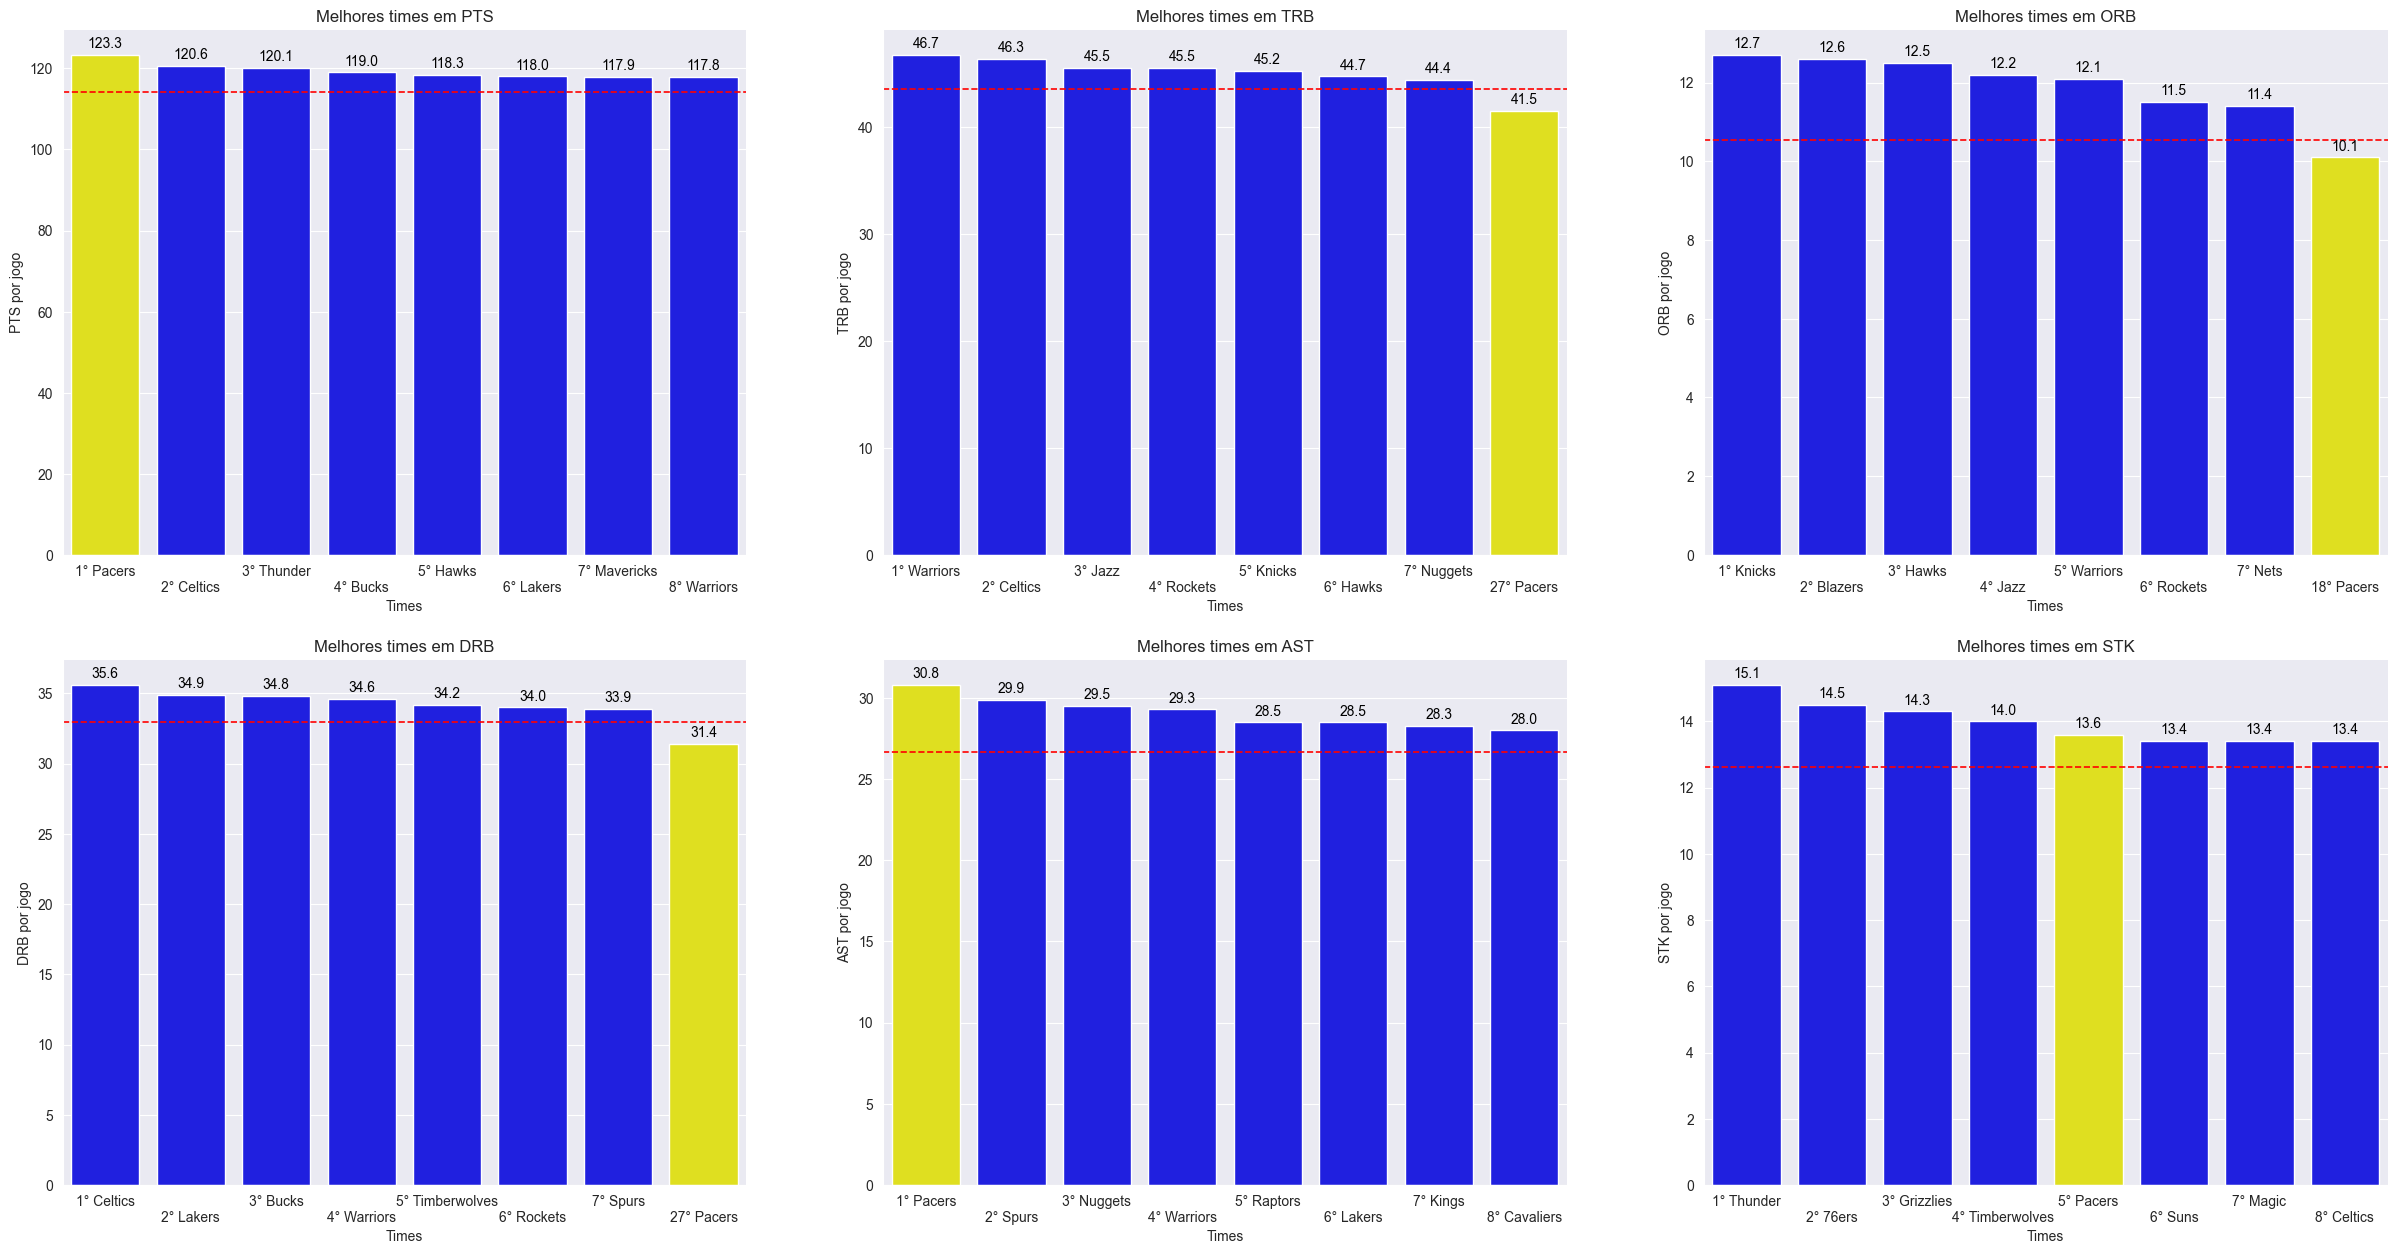

In [34]:
#Gráficos de estatísticas acumulativas do time
ranking_barchart(df_teams, ["PTS", "TRB", "ORB", "DRB", "AST", "STK"])

De acordo com os gráficos, pode-se concluir que:
    <ol>
        <li> O Indiana Pacers é o melhor time da NBA na parte ofensiva. Além de possuir o melhor ataque em pontos por jogo, também são o time que mais distribui assistências por jogo; </li>
        <li> Os pacers são um bom time nas principais stats defensivas coletivas, ficando em quinto no quesito Stocks; </li>
        <li> Os rebotes são a principal fraqueza do time. O time possui estatísticas medianas em rebotes ofensivos, os quais são de suma importância para a manutenção da posse de bola e pontos em segunda chance, e um desempenho horrível nos rebotes defensivos e na soma dos rebotes ofensivos e defensivos; </li>
    </ol>

Para o problema dos rebotes podem ser formuladas duas hipóteses como causa principal:
    <ol>
        <li> A falta de um pivô ou ala-pivô eficiente em rebotes; </li>
        <li> Um OFG% alto para adversários que jogam contra o Indiana Pacers e um FG% alto para o próprio Indiana. Ou seja, tanto Indiana quanto seus adversários convertem muitos arremessos por jogo, o que consequentemente diminui o número de rebotes nas partidas; </li>
    </ol>

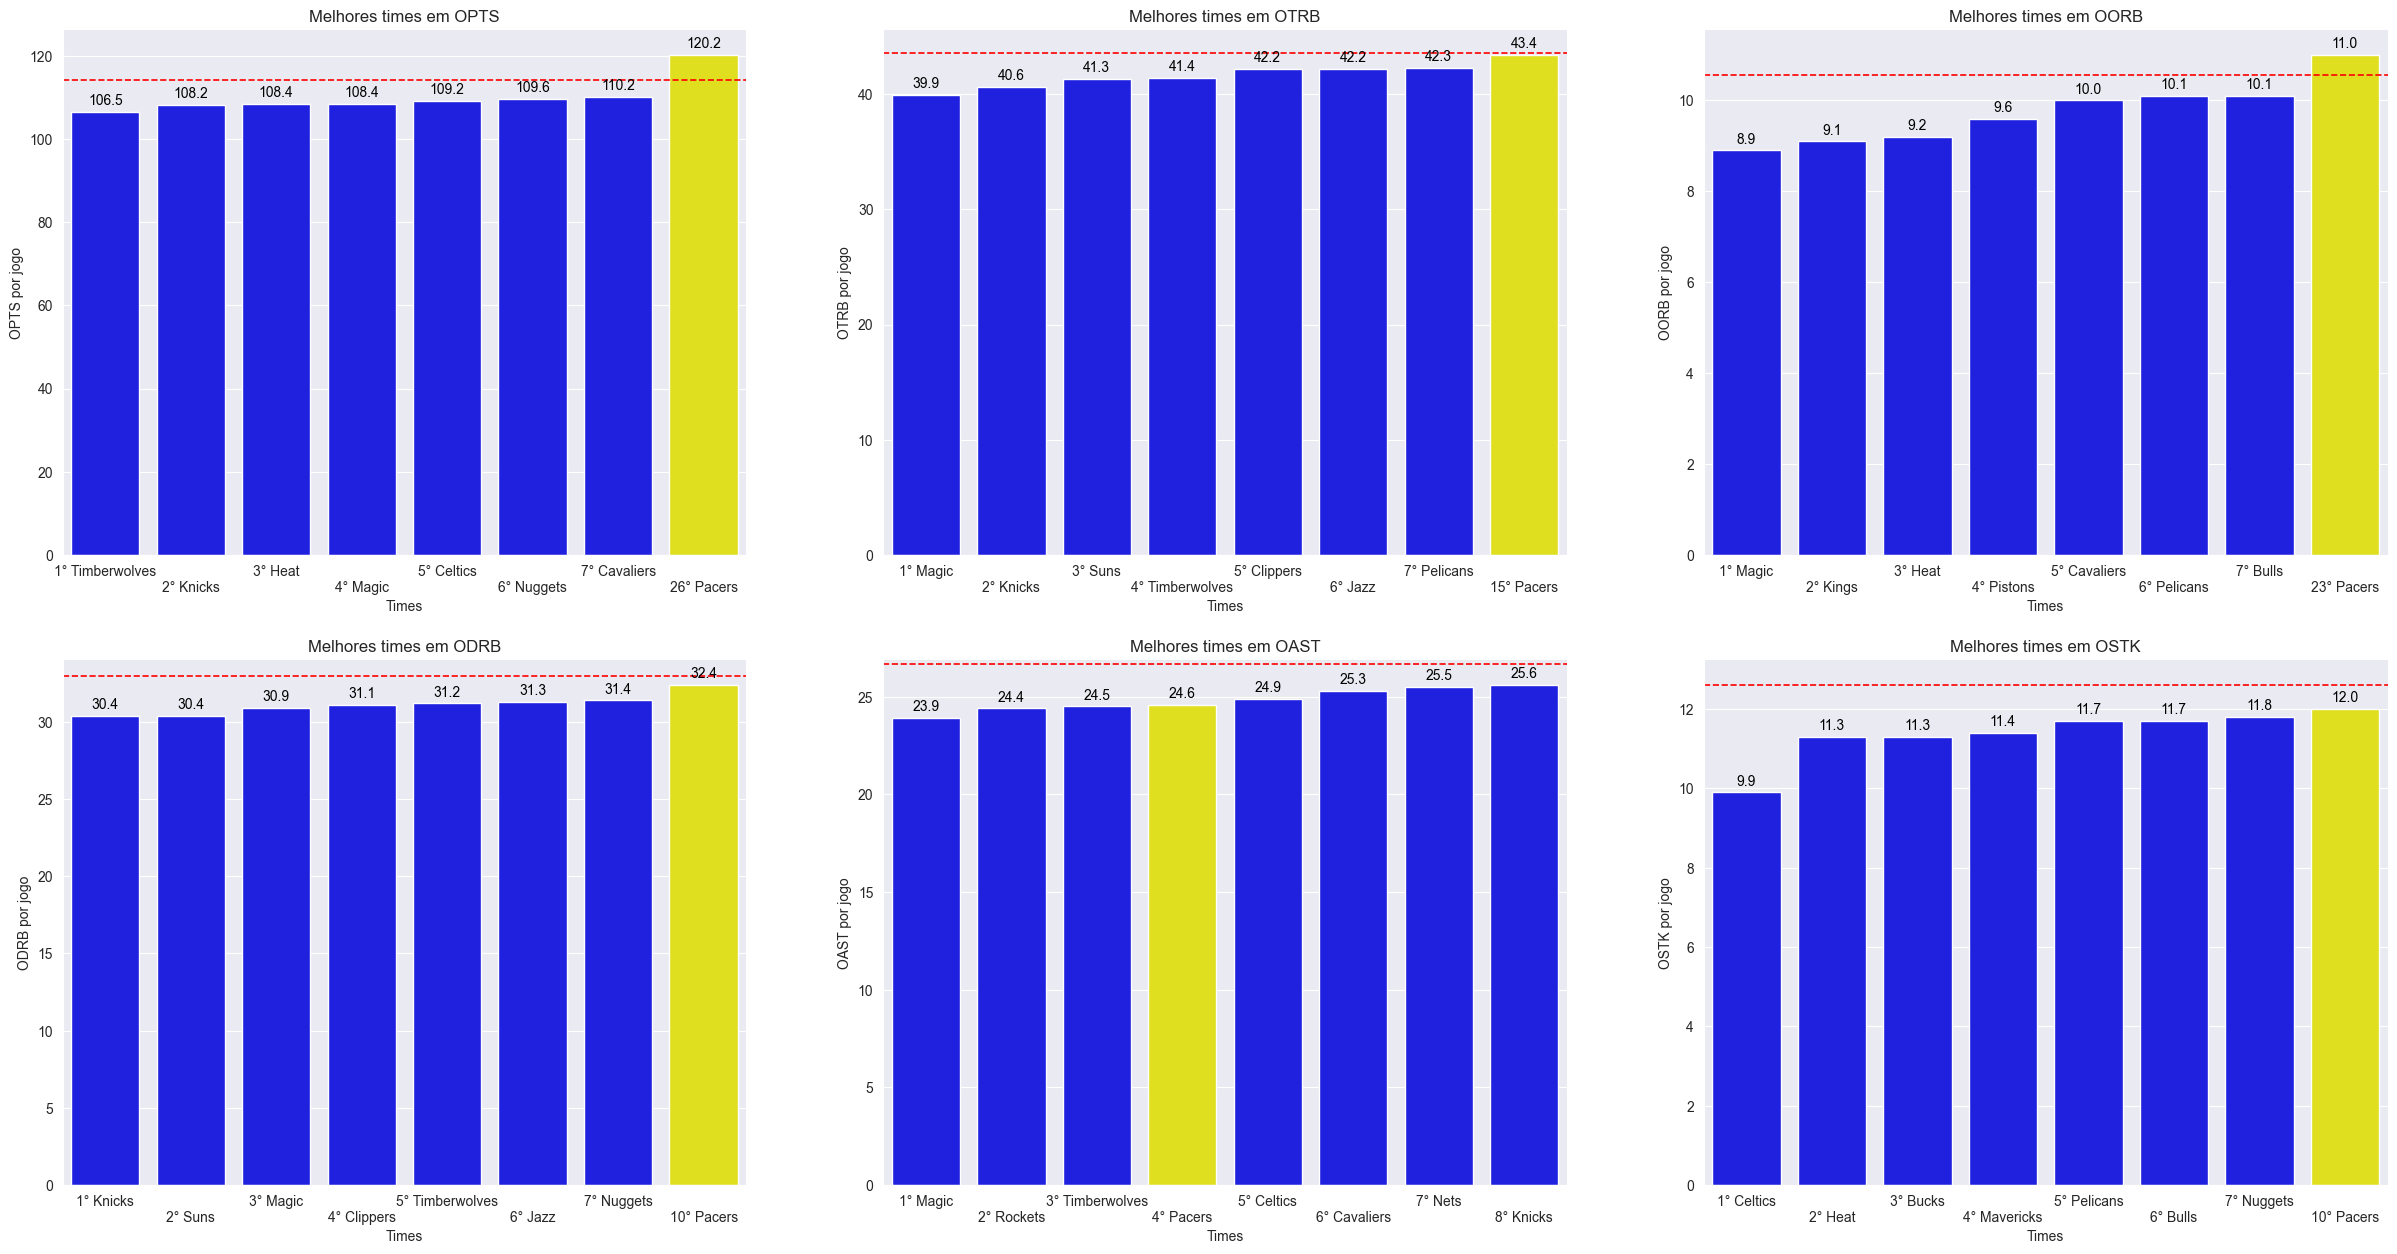

In [ ]:
#Gráfico de estatísticas acumulativas dos oponentes dos times
ranking_barchart(df_teams, ["OPTS", "OTRB", "OORB", "ODRB", "OAST", "OSTK"], True)

Os gráficos acima mostram a média da estatística que os times cedem ao seus adversários. No caso destes gráficos, quanto menor o número, melhor a performance defensiva. Dito isto, alguns pontos notáveis são:
<ol>
    <li> Os Pacers são uma das piores defesas em pontos cedidos por jogo (OPTS) com 120,2, um número altíssimo que acaba ofuscando as boas médias defensivas, como as assistências cedidas por jogo (OAST) e o stocks (STK), além de ser pior do que alguns times que tiveram campanha negativa. Este número fica mais bizarro ainda quando comparada à média de pontos por jogo do próprio Indiana (123,3), o que representa um saldo positivo de apenas 3,1 pontos por jogo e uma diferença de 25 posições entre o ataque e a defesa;</li>
    <li> A média de rebotes ofensivos cedidos por jogo (OORB) também é um ponto negativo. Cedendo 11,0 rebotes ofensivos por jogo, os Pacers são apenas o 23° colocado no fundamento. Isto é consonante com a média de rebotes defensivos (DRB) do Indiana e com a hipótese da falta de talento dos principais jogadores do time responsáveis pelo quesito. Esta estatística também está intimamente ligada a OPTS do time, pois quantos mais rebotes ofensivos cedidos, mais chances os rivais têm de pontuar; </li>
    <li> A franquia tem uma boa média de rebotes defensivos cedidos por jogo, o que implica em um bom aproveitamento nos arremessos;</li>
</ol>

<h3> <center> Gráficos de estatísticas percentuais

As estatísticas percentuais são estatísticas que representam uma taxa de acerto. Elas são obtidas pela divisão da quantidade acertos de determinado fundamento e a quantidade de tentativas no mesmo fundamento, e por fim multiplicadas por 100. Diferentemente das estatísticas acumulativas, aqui as duas figuras terão apenas 4 gráficos. Os gráficos apresentarão as médias percentuais e as posições no ranking de Indiana e dos outros 7 melhores times no quesito. Os gráficos também terão uma linha vermelha, que representa a média percentual da liga nesse aspecto.
A primeira figura conterá os gráficos com as estatísticas:
<ul>
    <li>Porcentagem de acerto dos arremessos de quadra (FG%);</li>
    <li>Porcentagem de acerto dos arremessos de 2 pontos (2P%);</li>
    <li>Porcentagem de acerto dos arremessos de 3 pontos (3P%);</li>
    <li>Porcentagem de acerto dos lances livres (FT%);</li>
</ul>

A segunda conterá:
<ul>
    <li>Porcentagem de acerto dos arremessos de quadra dos oponentes (OFG%);</li>
    <li>Porcentagem de acerto dos arremessos de 2 pontos dos oponentes (O2P%);</li>
    <li>Porcentagem de acerto dos arremessos de 3 pontos dos oponentes (O3P%);</li>
    <li>Porcentagem de acerto dos lances livres dos oponentes (OFT%);</li>
</ul>

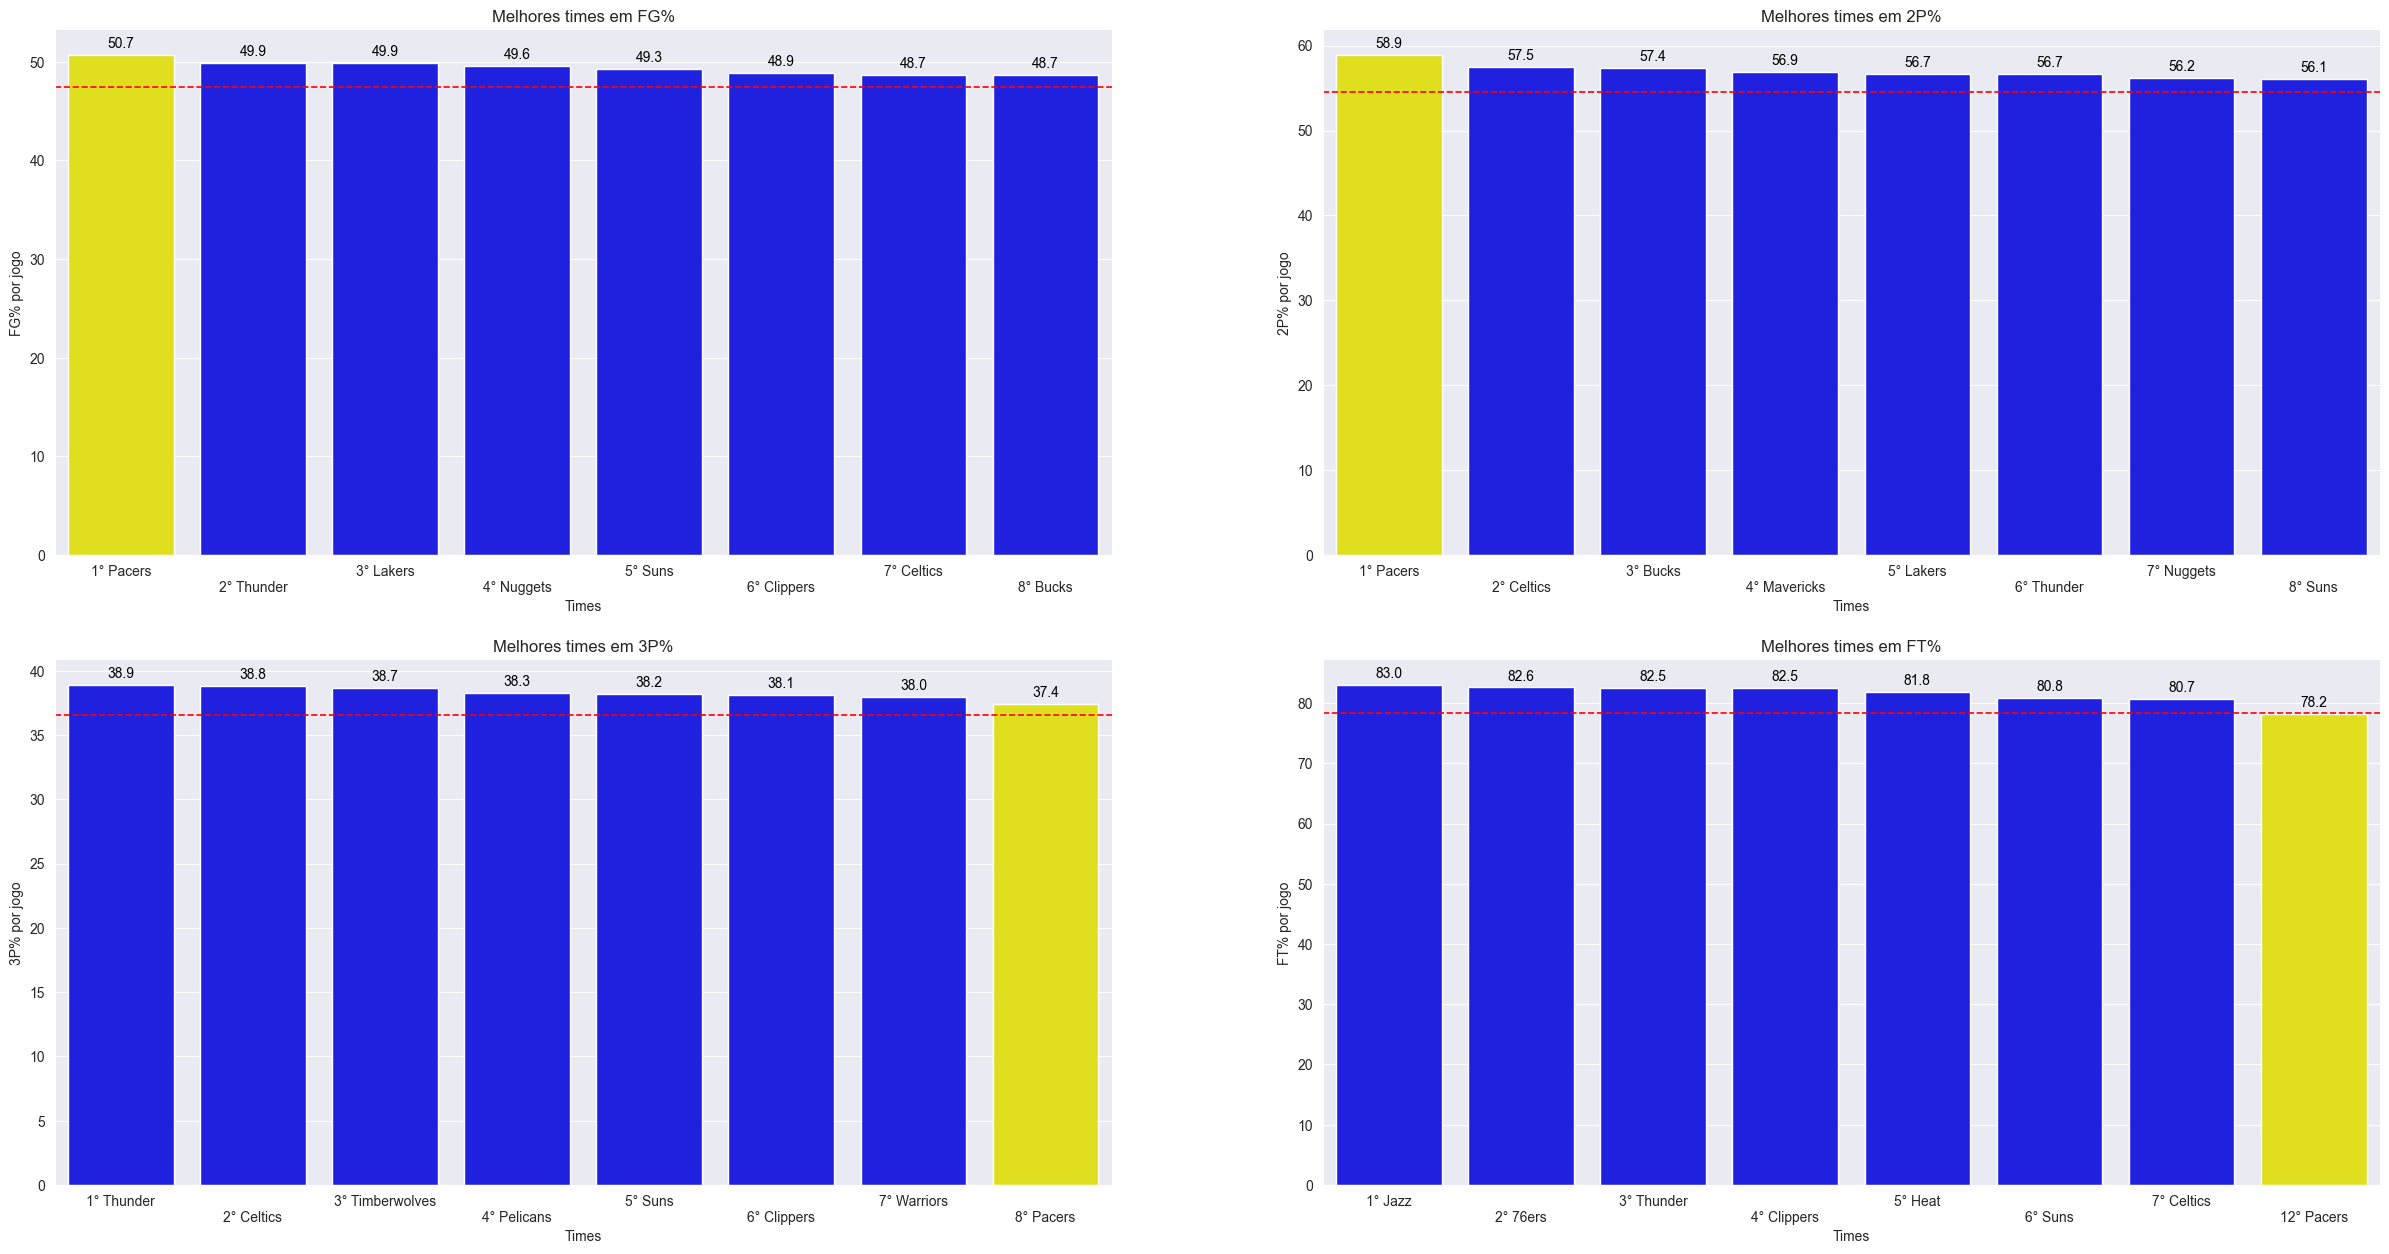

In [ ]:
#Gráfico de estatísticas percentuais dos times
ranking_barchart(df_teams, ["FG%", "2P%", "3P%", "FT%"])

Observa-se que:
<ol>
    <li>Indiana tem o melhor percentual de arremessos de quadra convertidos e de arremessos convertidos de 2 pontos da NBA. Também tem um excelente percentual de 3 pontos. Com isso é possível afirmar que o ataque é extremamente versátil e letal, um ponto que ressalta o porque Indiana foi o melhor ataque da liga.</li>
    <li>A eficiência em arremessos livres está na média da liga.</li>
</ol>

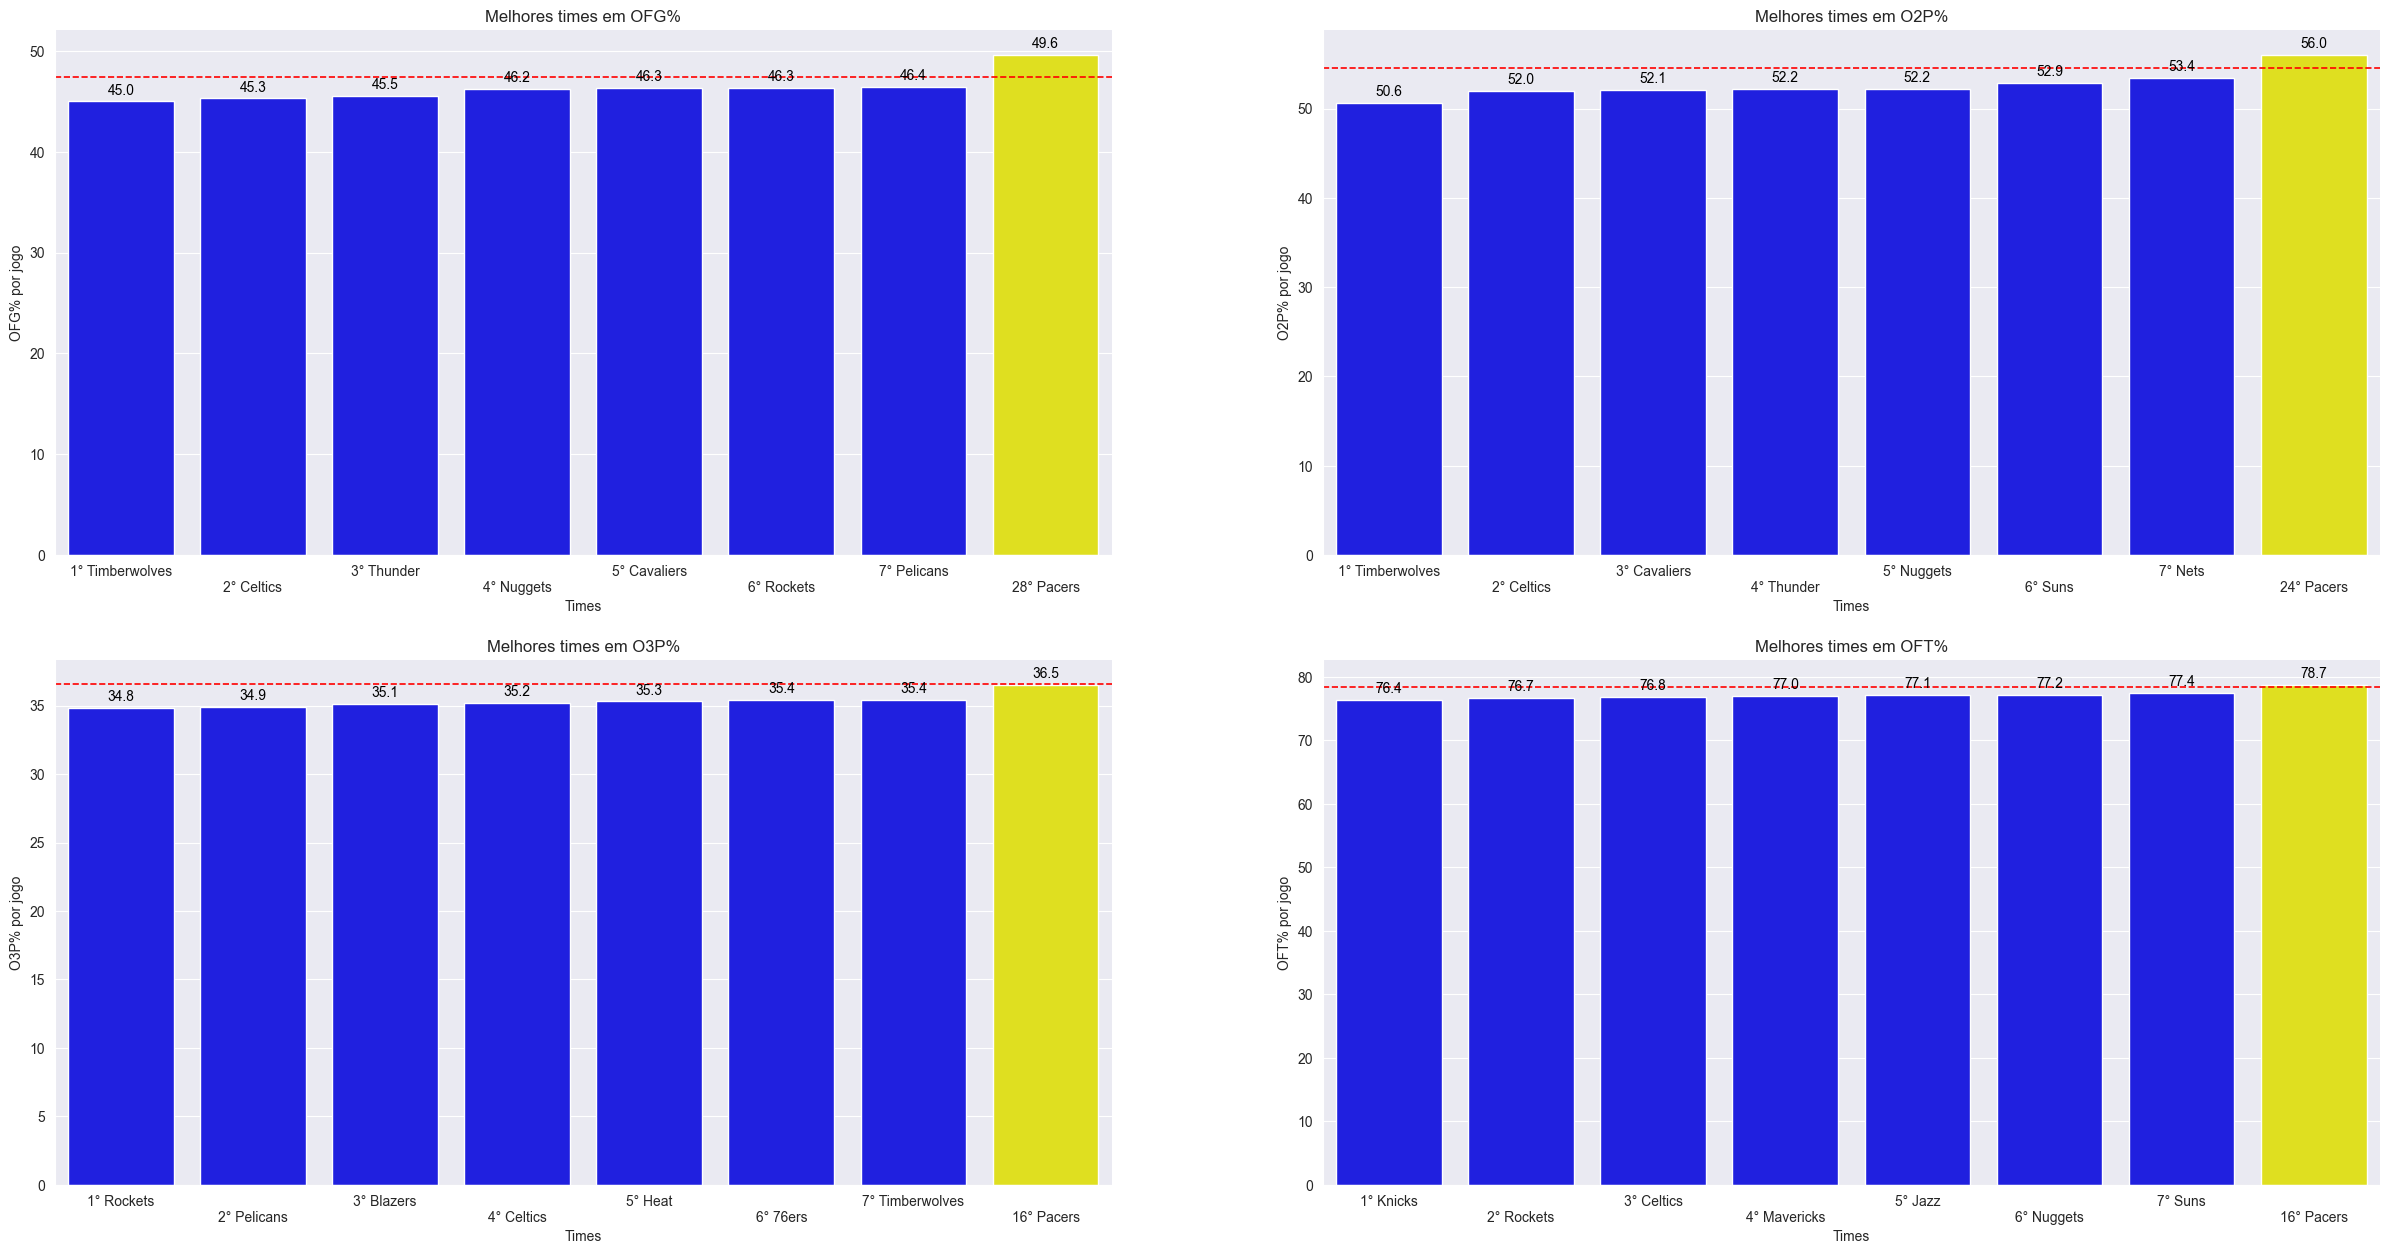

In [ ]:
#Gráfico de estatísticas percentuais dos oponentes dos times
ranking_barchart(df_teams, ["OFG%", "O2P%", "O3P%", "OFT%"], True)

Como os gráficos abordam as estatísticas dos rivais, quanto menor o percentual, melhor o desempenho. Nota-se então que:
<ol>
    <li>O Indiana Pacers é um dos times que mais cede arremessos convertidos na liga. Sua defesa contra arremessos dois pontos é péssima e a de 3 pontos apenas mediana. O time é o terceiro que mais cede arremessos convertidos, o que explica sofrer 120,2 pontos por jogo. Tais métricas também refletem que a segunda hipótese do imbróglio dos rebotes também é aceita.</li>
    <li>O número de arremessos livres sofridos não é tão revelante nesse caso, porém, se em alto número, pode significar um time que comete muitas faltas No caso dos Pacers, o número está na média da liga. </li>
</ol>

<h2> <center> Análise Descritiva dos Dados (ADD) individuais do Indiana Pacers

Nesta parte do estudo, irei analisar os dados individuais dos jogadores do Indiana Pacers e compará-los com o resto dos jogadores da liga. Isto irá me ajudar a compreender os jogadores mais relevantes do time, suas contribuições ofensivas e defensivas, e explorar as necessidades posicionais do time para o futuro.

Para iniciar, começarei filtrando do df_players as estatísticas dos jogadores do Indiana Pacers e salvando-as em um novo dataframe chamado "indiana_df"

In [19]:
#Dataframe com as estatísticas dos jogadores do Indiana Pacers
indiana_df = df_players.loc[df_players["Tm"] == "IND", ["Player", "G", "GS", "MP", "Pos", "PTS", "ORB", "DRB", "TRB", "AST", "STK", "FG", "FGA", "FG%", "2PA", "2P", "2P%", "3PA", "3P", "3P%", "FT", "FTA", "FT%", "eFG%"]].sort_values(by = "GS", ascending = False)

indiana_df

,Player,G,GS,MP,Pos,PTS,ORB,DRB,TRB,AST,...,2PA,2P,2P%,3PA,3P,3P%,FT,FTA,FT%,eFG%
658,Myles Turner,77,77,27.0,C,17.1,1.5,5.5,6.9,1.3,...,7.6,4.7,61.5,4.2,1.5,35.8,3.2,4.1,77.3,58.7
266,Tyrese Haliburton,69,68,32.2,PG,20.1,0.5,3.4,3.9,10.9,...,7.4,4.4,59.5,7.8,2.8,36.4,2.8,3.3,85.5,57.0
484,Aaron Nesmith,72,47,27.7,SF,12.2,0.9,2.9,3.8,1.5,...,4.2,2.4,58.1,4.6,1.9,41.9,1.5,1.9,78.1,60.6
483,Andrew Nembhard,68,47,25.0,PG,9.2,0.5,1.5,2.1,4.1,...,5.2,2.9,56.7,2.5,0.9,35.7,0.7,0.8,80.4,55.7
600,Pascal Siakam,41,41,31.8,PF,21.3,2.1,5.7,7.8,3.7,...,13.3,7.7,58.0,2.5,1.0,38.6,3.0,4.2,69.9,57.9
99,Bruce Brown,33,33,29.7,SG,12.1,0.8,3.9,4.7,3.0,...,6.5,3.5,54.5,3.1,1.0,32.7,2.0,2.5,81.7,52.7
650,Obi Toppin,82,28,21.1,PF,10.3,1.0,2.9,3.9,1.6,...,4.0,2.8,70.6,3.1,1.2,40.3,0.9,1.2,77.0,66.1
290,Buddy Hield,52,28,25.7,SF,12.0,0.7,2.6,3.2,2.7,...,3.1,1.8,57.5,6.9,2.6,38.4,0.5,0.6,84.8,57.5
414,Bennedict Mathurin,59,19,26.1,SF,14.5,1.0,2.9,4.0,2.0,...,7.6,3.7,48.1,3.6,1.4,37.4,3.1,3.8,82.1,50.7
614,Jalen Smith,61,14,17.2,C,9.9,1.8,3.7,5.5,1.0,...,4.1,2.8,68.9,2.4,1.0,42.4,1.2,1.7,69.2,67.0


O Indiana possui 22 jogadores em seu roster. Como indicado no começo do estudo, os 5 jogadores com mais jogos iniciados em quadra serão considerados os titulares. Dado isto, os titulares de Indiana e suas respectivas posições são:
<ol>
    <li>Myles Turner (Pivô (C))</li>
    <li>Tyrese Haliburton (Armador (PG))</li>
    <li>Aaron Nesmith (Ala (SF))</li>
    <li>Andrew Nembhard (Armador (PG))</li>
    <li>Pascal Siakam (Ala-pivô (PF))</li>
</ol>

<h3> <center> Gráfico de estatísticas cumulativas dos jogadores do Indiana Pacers

Assim como na análise coletiva, também serão feitos gráficos para estatísticas acumulativas aqui. Nesse caso

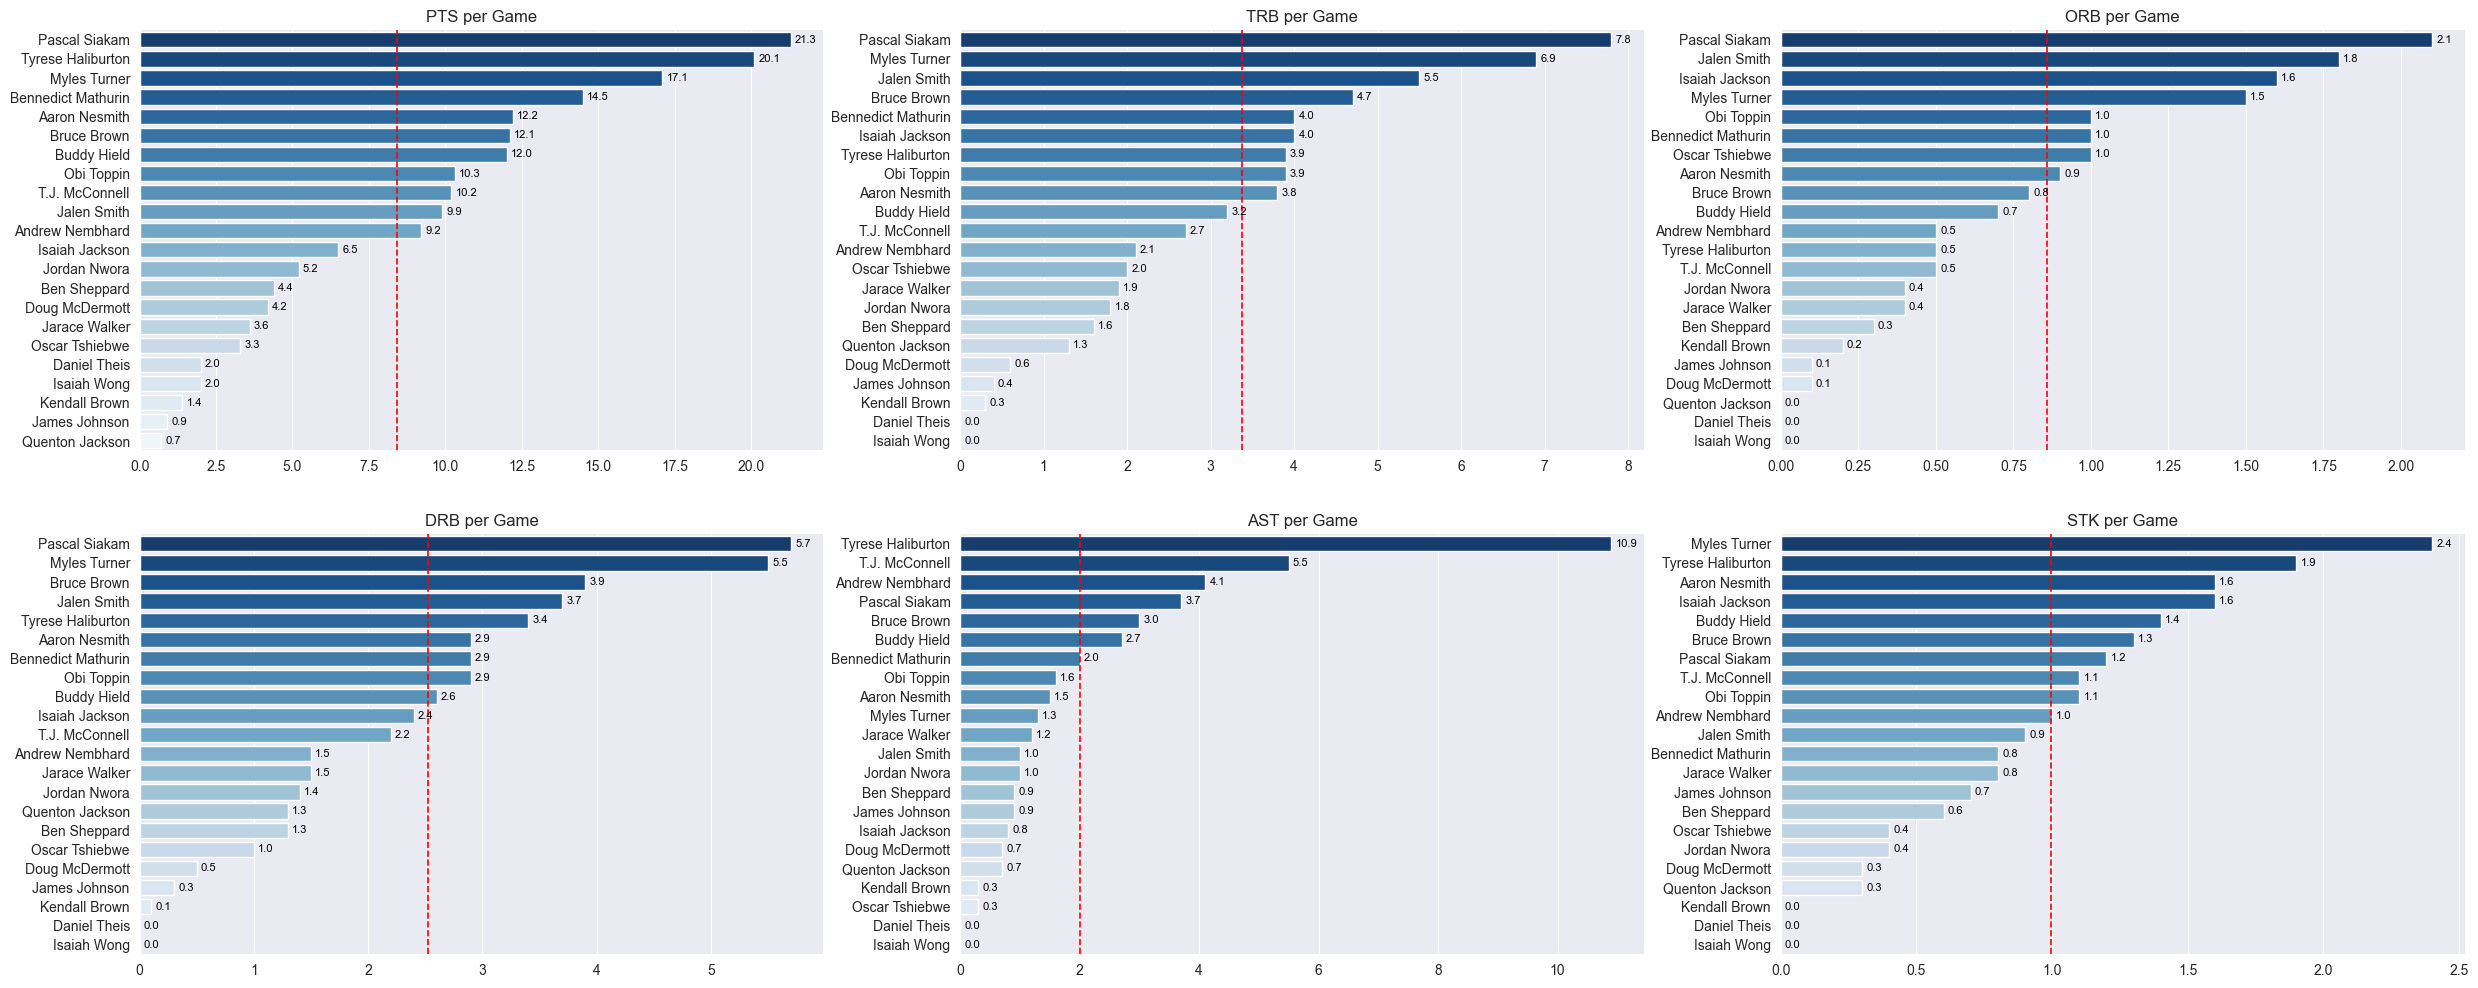

In [ ]:
df_filtered = df_players[df_players["Tm"] == "TOT"].copy() #Filtra os jogadores que jogaram em mais dois times, guardando apenas a média "TOT" deles.

single_team_players = df_players[~df_players["Player"].isin(df_filtered["Player"])].copy() #Filta os jogadores que não estão no df_filtered, ou seja, os jogadores que jogaram em apenas um time.

df_filtered = pd.concat([df_filtered, single_team_players]) #Concatena os dataframes df_filtered e single_team_players, formando o dataframe com a média geral de todos os jogadores da liga.

overall_mean = df_filtered["PTS"].mean()

columns = ["PTS", "TRB", "ORB", "DRB", "AST", "STK"] #Estatísticas que serão utilizadas nos gráficos

#Construção dos Gráficos
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 12))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]

    sorted_indiana_df = indiana_df.sort_values(by = column, ascending = False)

    media = df_filtered[column].mean()
    
    sns.set_style("darkgrid")
    sns.barplot(
        y = "Player",
        x = column,
        data = sorted_indiana_df,
        ax  = ax,
        hue = "Player",
        palette = "Blues_r",
        orient = "h",
        legend = False,
    )

    ax.axvline(x = media, color = 'red', linestyle = '--', linewidth = 1.2, label = f"Média ({media:.2f}")
    ax.set_title(f"{column} per Game", fontsize = 12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.spines[["top", "right"]].set_visible(False)

    for bar in ax.patches:
        ax.annotate(
            f"{bar.get_width():.1f}",
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            fontsize = 8,
            color = "black",
            va =  "center",
            ha = "left",
            xytext = (3, 0),
            textcoords = "offset points",
        )

plt.show()

Dado estes 6 gráficos, nota-se alguns pontos:

1. O Indiana Pacers possui uma ótima distribuição de pontos por jogador, com 9 jogadores acima de 10 pontos por jogo e 11 jogadores acima da média de pontos da liga, considerando todos os jogadores.
2. Tyrese Haliburton é o principal responsável pelo ataque, liderando o time em assistências e sendo um dos líderes em pontos. Também destaca-se sua contribuição defensiva com 1.9 stocks por jogo.
3. Pascal Siakam é uma peça-chave para o time, liderando-o em pontos e rebotes, além de estar acima da média da liga em todas as estatísticas básicas.
4. Embora tenha uma enorme presença ofensiva e defensiva, Myles Turner destaca-se negativamente nos rebotes, fundamento o qual é essencial para sua posição. Isto fica ainda mais acentuado nos rebotes ofensivos (ORB), onde sua média é mais baixa que a dos reservas Jalen Smith e Isaiah Jackson e acentua ainda mais a lacuna de talentos em rebotes presente no time.
5. T.J. McConnel, Obi Toppin, Buddy Hield e Bruce Brown são os jogadores mais impactantes do banco de reservas, considerando, no geral, todos os fundamentos presentes nos gráficos.

<h3> <center> Gráfico de participação por minuto

Para analisar o impacto que cada jogador em quadra utilizarei o gráfico de participação por minuto. Ele mostra quantos pontos, assistências, rebotes ou stocks, um jogador faz por minuto em quadra.

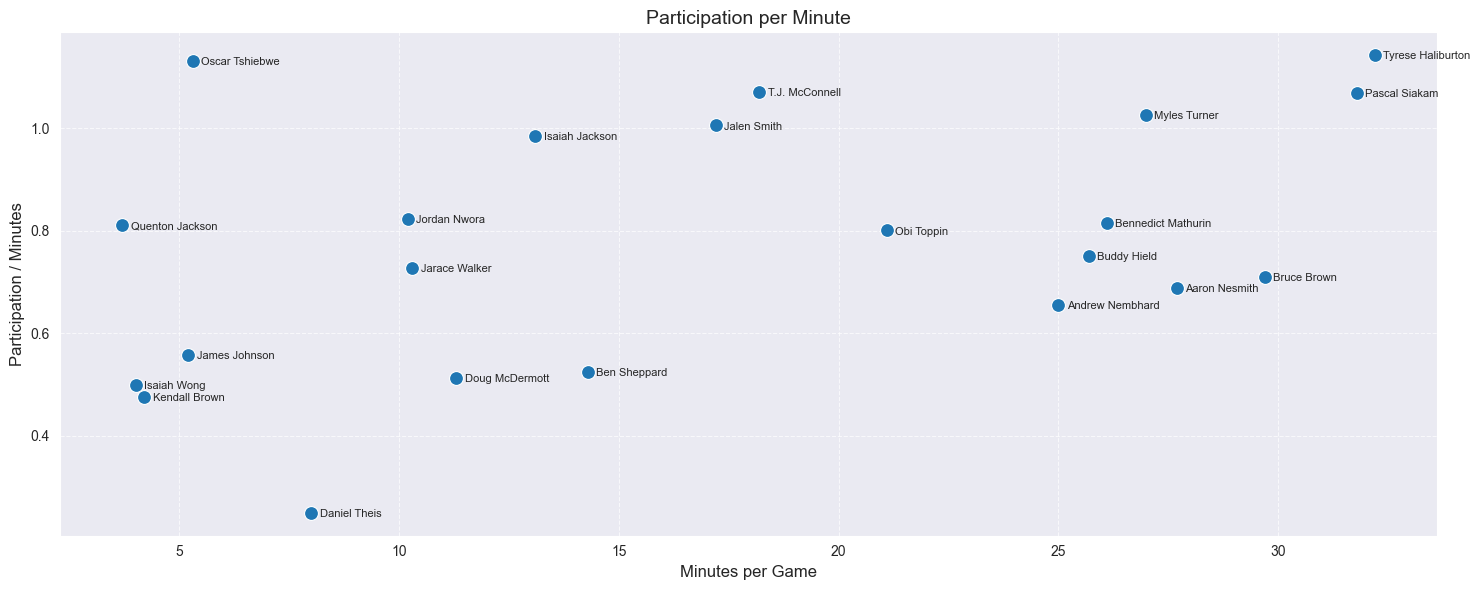

In [35]:
indiana_df["Participation per Minute"] = (indiana_df["PTS"] + indiana_df["TRB"] + indiana_df["AST"] + indiana_df["STK"]) / indiana_df["MP"]

plt.figure(figsize = (15, 6))
sns.set_style("darkgrid")

scatter = sns.scatterplot(
    data = indiana_df,
    x = "MP",
    y = "Participation per Minute",
    s = 100,
)

for index, txt in enumerate(indiana_df["Player"]):
    plt.annotate(
        txt,
        (indiana_df.iloc[index]["MP"], indiana_df.iloc[index]["Participation per Minute"]),
        fontsize = 8,
        textcoords = "offset points",
        xytext = (6, -3), 
        ha = "left"
    )

plt.grid(True, linestyle = "--", alpha = 0.7)
plt.title("Participation per Minute", fontsize = 14)
plt.xlabel("Minutes per Game", fontsize = 12)
plt.ylabel("Participation / Minutes", fontsize = 12)
plt.tight_layout()

plt.show()

Por este gráfico pode-se perceber mais ainda o impacto que Tyrese Haliburton e Pascal Siakam têm em quadra, registrando mais de uma participação por minuto, jogando mais de 30 minutos por partida, cada. Embora tenha problemas com rebotes, Myles Turner também é peça fundamental e extremamente participativa quando está em quadra. Também destaca-se mais uma vez os jogadores reservas, os quais mantém um bom nível de participação, o que ajuda a manter o ritmo do time no jogo.

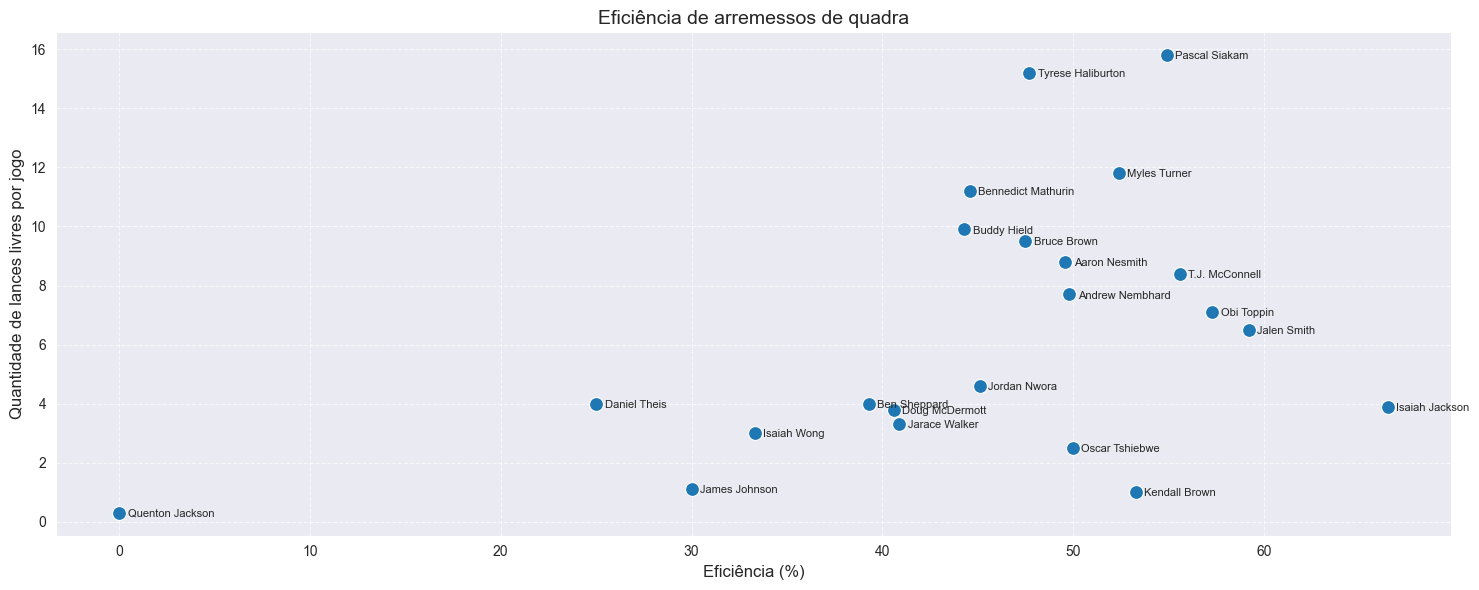

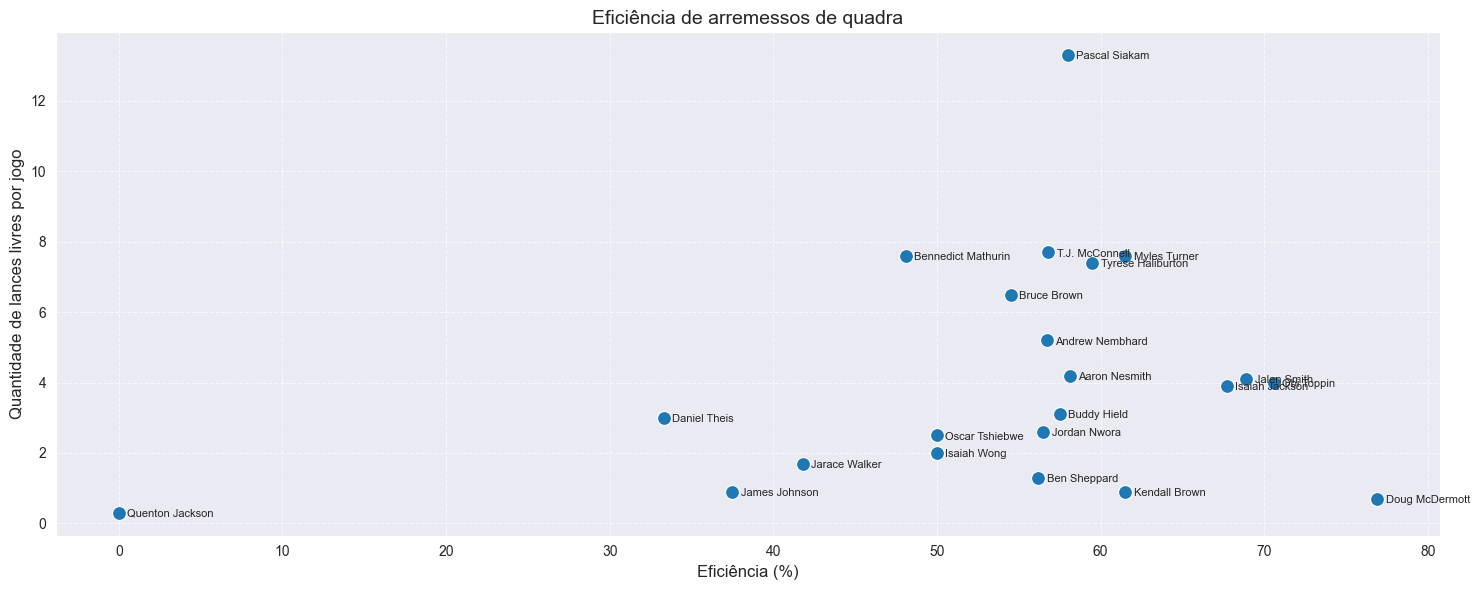

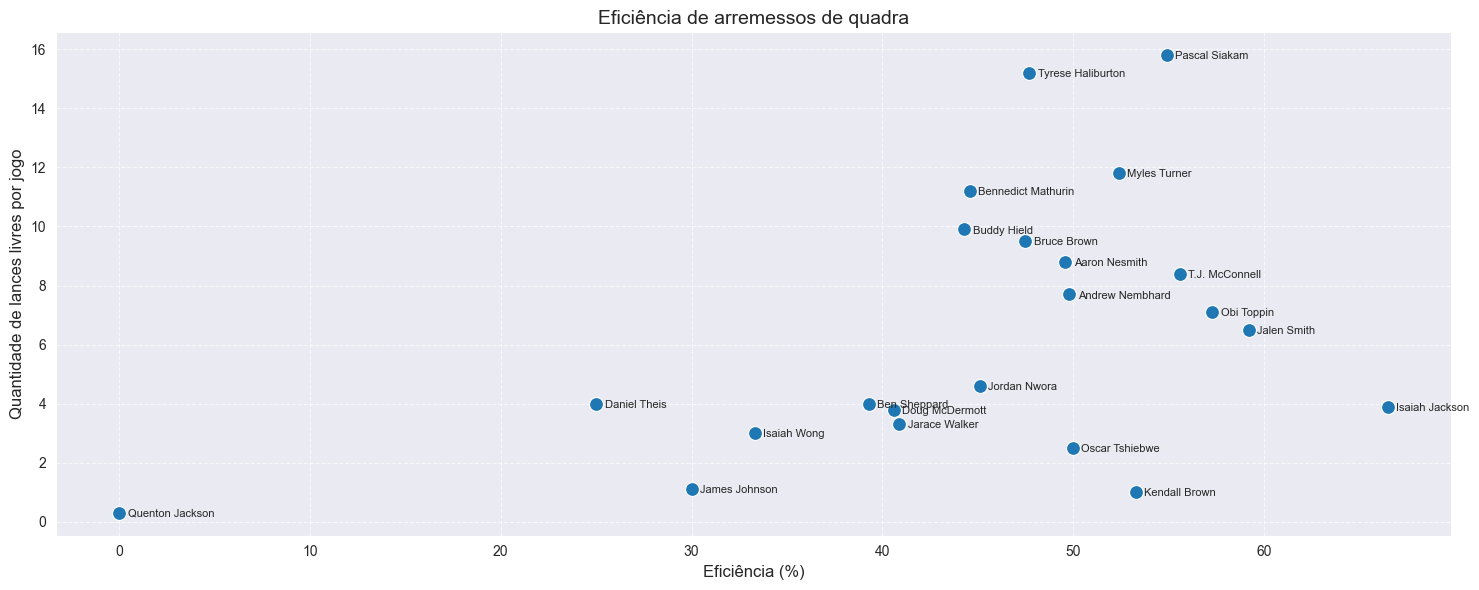

In [22]:
efficiency_scatter(indiana_df, ["FG%", "FGA"])
efficiency_scatter(indiana_df, ["2P%", "2PA"])
efficiency_scatter(indiana_df, ["FG%", "FGA"])

<h3> <center> Comparação entre o quinteto titular do Indiana com o resto dos times da NBA 

Agora, irei comparar as médias dos titulares do Indiana Pacers com o resto dos titulares da liga em suas respectivas posições. Para isto, primeiramente extrairei a média dos titulares de cada franquia da NBA e salvarei em um dataframe.

In [23]:
set_teams = set(team for team in df_players["Tm"] if "Tm" != "TOT") #Set com a sigla de todos os times da liga, exceto "TOT"

df_starters = pd.DataFrame() #Dataframe onde os dados serão guardados

for team in set_teams:
    df_leaders_players = df_players.loc[df_players["Tm"] == team, ["Player", "Pos", "Tm", "G", "GS", "MP", "PTS", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "STK", "FG%", "2P%", "3P%", "eFG%", "FT%"]].sort_values(by = "GS", ascending = False) #Procura no df_players os jogadores que pertencem ao "team" e salva-os, ordenando-os por jogos iniciados

    df_starters = pd.concat([df_starters, df_leaders_players.head(5)]) #Concatena no df_starters apenas os 5 primeiros jogadores de df_leaders_players

Com todos os jogadores titulares no dataframe, usarei a função "media" para obter listas com a média estatística de cada posição do jogo entre os titulares e também as médias dos jogadores titulares dos Pacers.

In [27]:
#Médias por posição baseadas nos titulares (5 jogadores com mais GS de cada time) da liga
mean_stats_pg = media(df_starters, df_players, "Pos", "PG", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
mean_stats_center = media(df_starters, df_players, "Pos", "C", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
mean_stats_sg = media(df_starters, df_players, "Pos", "SG", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
mean_stats_sf = media(df_starters, df_players, "Pos", "SF", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
mean_stats_pf = media(df_starters, df_players, "Pos", "PF", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])

#Média dos jogadores dos Pacers
haliburton_stats = media(df_starters, df_players, "Player", "Tyrese Haliburton", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
siakam_stats = media(df_starters, df_players, "Player", "Pascal Siakam", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
turner_stats = media(df_starters, df_players, "Player", "Myles Turner", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
nesmith_stats = media(df_starters, df_players, "Player", "Aaron Nesmith", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])
nembhard_stats = media(df_starters, df_players, "Player", "Andrew Nembhard", ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"])

Agora que as estatísiticas já estão salvas, os gráficos serão plotados. As estatísticas abaixo serão plotadas em uma figura com dois gráficos de radar para cada jogador. Um gráfico será de estatísticas acumulativas e o outro de estatísticas percentuais.

In [28]:
subjects_1 = ["PTS", "AST", "TRB", "STK"] #Estatísticas usadas no 1° gráfico
subjects_2 = ["FG%", "eFG%", "2P%", "3P%", "FT%"] #Estatísticas usadas no 2° gráfico

<h3> <center> Tyrese Haliburton vs armadores

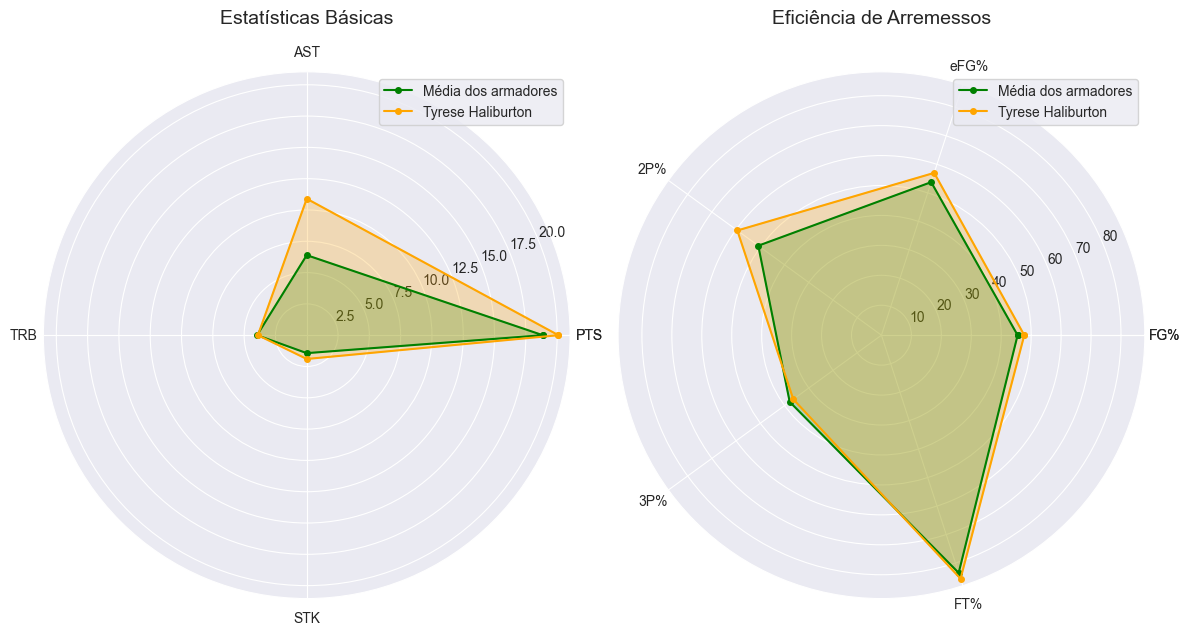

In [29]:
plot_radar_charts(
    subjects_1, mean_stats_pg[:4], 
    subjects_2, mean_stats_pg[4:], 
    mean_stats_pg, haliburton_stats, 
    "Média dos armadores", "Tyrese Haliburton", 
    'g', 'orange'
)

Tyrese Haliburton possui um desempenho em assistências muito acima dos titulares da liga, aliando isto com uma quantidade de pontos também muito alta, levemente abaixo da média da sua posição. Seu percentual de arremessos convertidos também é bastante alto, estando acima da média em quase todos os fundamentos, menos em bolas de 3, a qual também possui uma média excelente. A sua capacidade de gerar pontos diretamente ou indiretamnete, em junção com sua eficiência o torna uma ameaça continua para as defesas adversárias, fazendo dele um dos melhores jogadores em sua posição.

<h3> <center> Andrew Nembhard vs armadores

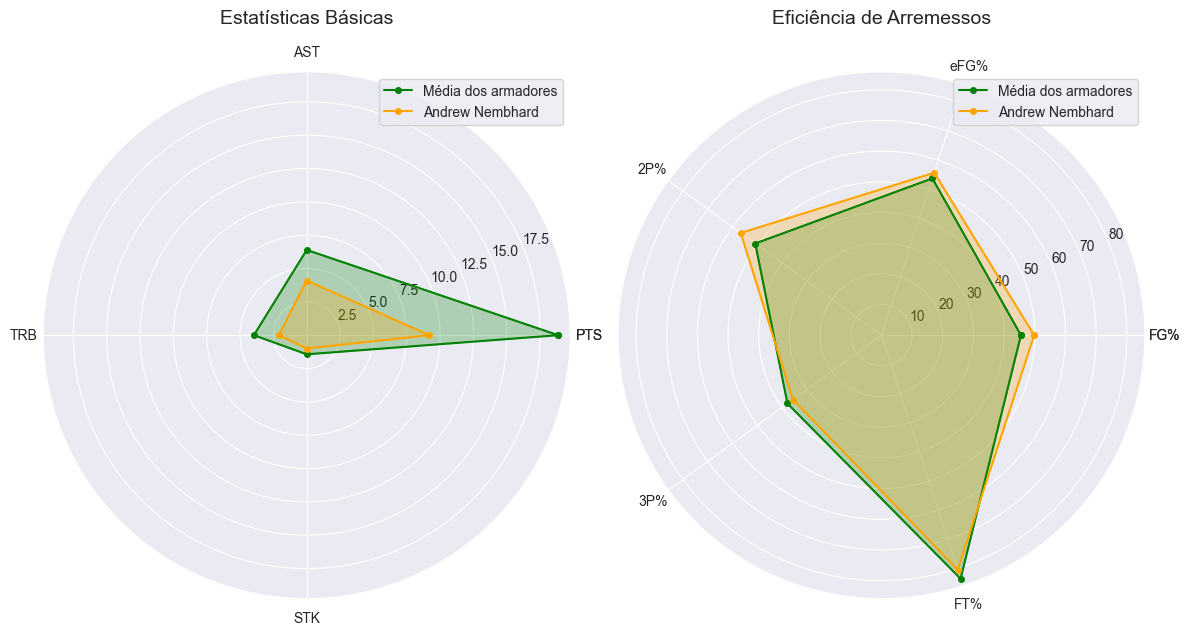

In [30]:
plot_radar_charts(
    subjects_1, mean_stats_pg[:4], 
    subjects_2, mean_stats_pg[4:], 
    mean_stats_pg, nembhard_stats, 
    "Média dos armadores", "Andrew Nembhard", 
    'g', 'orange'
)

Como dito anteriormente, Andrew Nembhard possui um baixo volume de arremessos tentados por jogo, insight que é refletido na sua baixa pontuação. Porém ele possui as taxas de conversão de arremessos (FG%), conversão de arremessos de 2 pontos (2P%) e a de eficiência de arremessos (eFG%) altíssimas, além de uma bola de 3 levemente abaixo da média. Para alguém que é a quinta opção ofensiva do time e segundo armador, ele possui médias decentes e que mostram que o mesmo é um jogador de caráter defensivo.

<h4> <center> Myles Turner vs pivôs

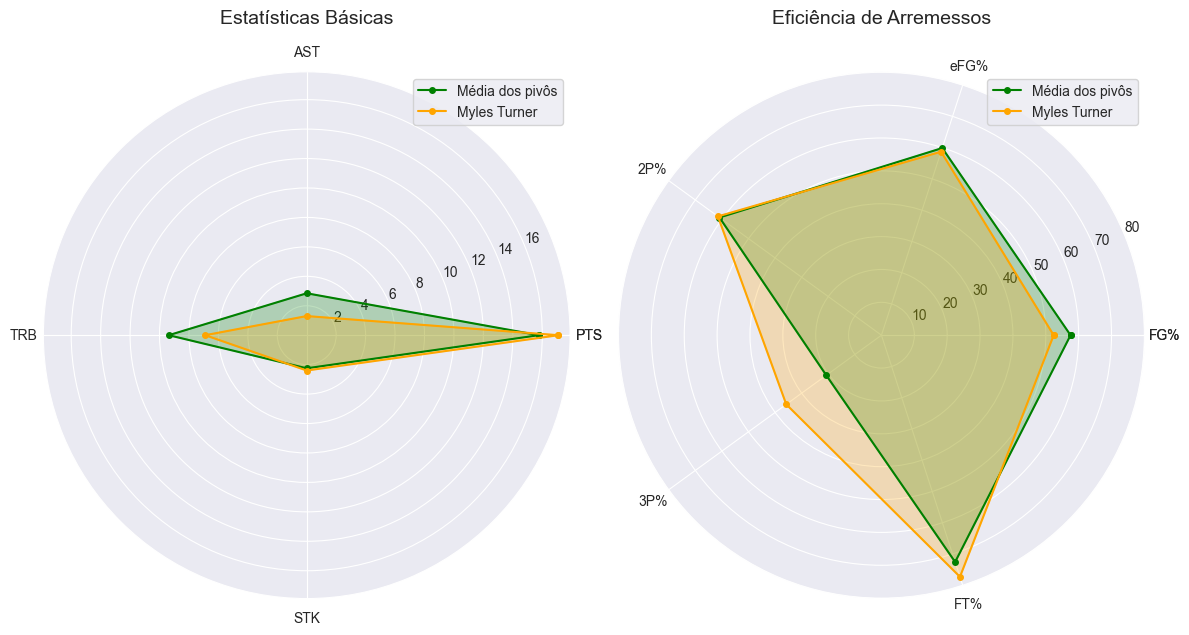

In [31]:
plot_radar_charts(
    subjects_1, mean_stats_center[:4], 
    subjects_2, mean_stats_center[4:], 
    mean_stats_center, turner_stats, 
    "Média dos pivôs", "Myles Turner", 
    'g', 'orange'
)

Diferentemente dos pivôs tradicionais, Myles Turner tem o arremesso de 3 pontos como seu principal diferencial. Sua taxa de conversão de arremessos de 3 pontos é fora do normal para um jogador da posição, ajudando no espaçamento de quadra do time e na infiltração dos armadores no garrafão, contribuindo para a explosividade do ataque dos Pacers. Seu arremesso de 2 pontos e arremesso livre também são altamente eficazes e mesmo abaixo da média, seu FG% é decente, pois ele tenta muito mais arremessos de 3 pontos que os outros jogadores da sua posição. Seu desempenho em pontos por jogo e stocks por jogo também são excelentes e Embora seu desempenho em assistências seja abaixo da média dos pivôs, é decente para o time, pois seu aspecto principal é ser um finalizador de jogadas. Os rebotes talvez sejam seu único ponto negativo, porém melhorando nesse quesito, ele tem pleno potencial para ser um dos jogador elite entre os pivôs.

<h4> <center> Pascal Siakam vs alas-pivôs

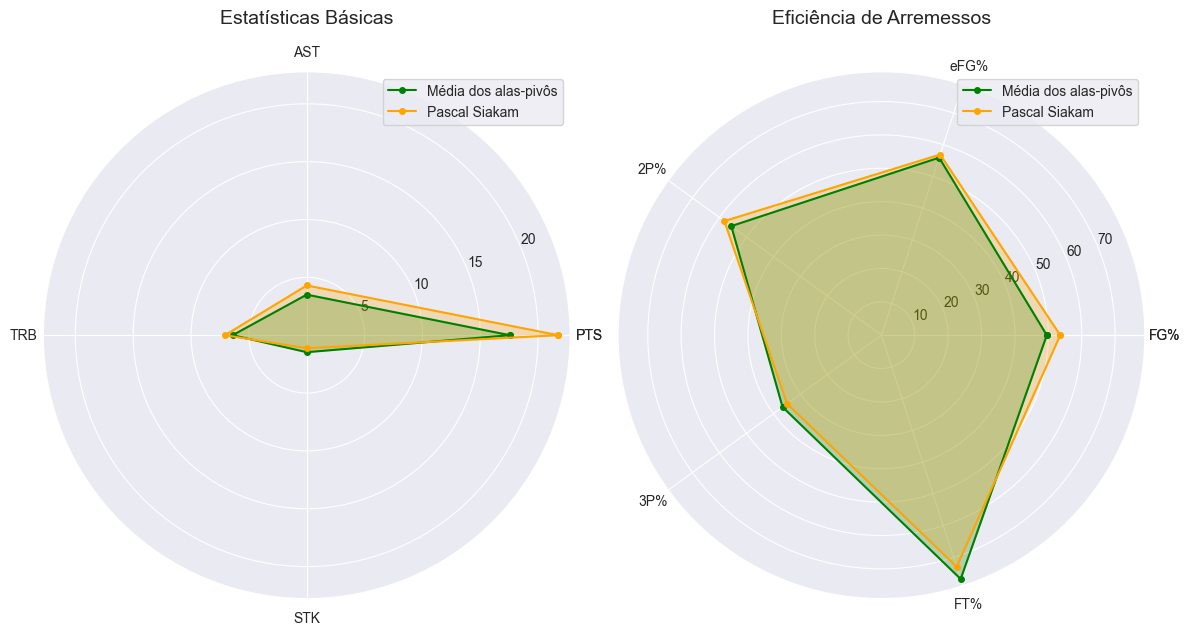

In [32]:
plot_radar_charts(
    subjects_1, mean_stats_pf[:4], 
    subjects_2, mean_stats_pf[4:], 
    mean_stats_pf, siakam_stats, 
    "Média dos alas-pivôs", "Pascal Siakam", 
    'g', 'orange'
)

Pascal Siakam é muito consistente em todos os aspectos do seu jogo, deixando um pouco a desejar somente em lances livres e arremessos de 3, o que não interfere tanto em seu estilo de jogo. A única coisa a se falar sobre ele, é que suas métricas demonstram que ele não é só um dos melhores jogadores dos Pacers, mas sim um dos melhores e mais eficientes jogadores em atividade na sua posição.

<h4> <center> Aaron Nesmith vs alas

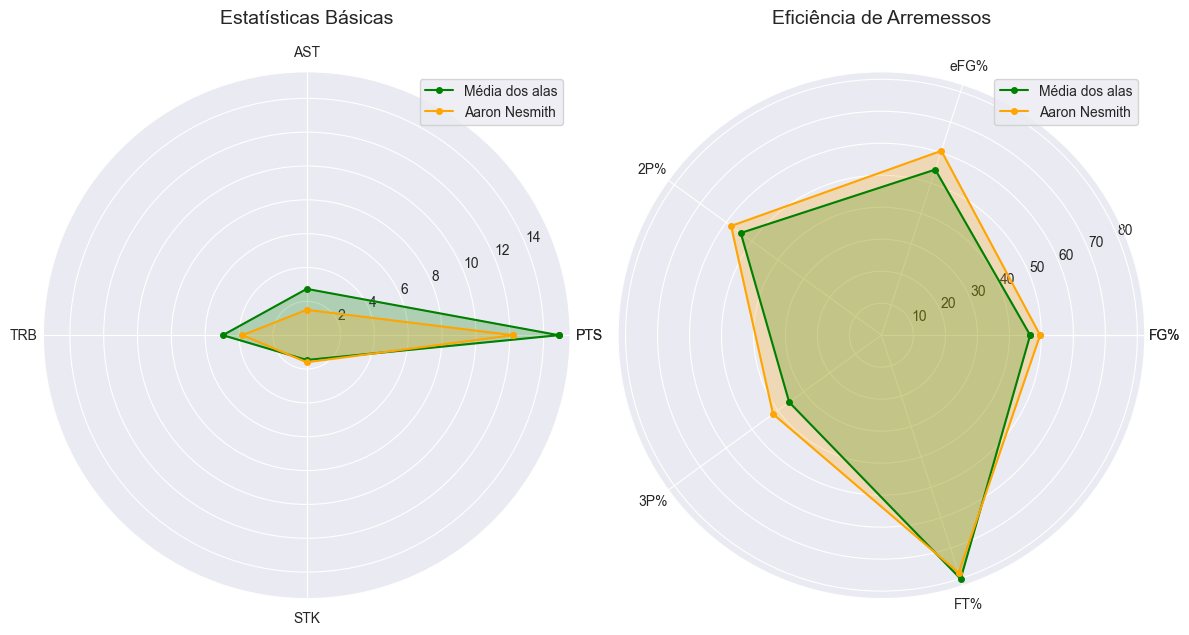

In [33]:
plot_radar_charts(
    subjects_1, mean_stats_sf[:4], 
    subjects_2, mean_stats_sf[4:], 
    mean_stats_sf, nesmith_stats, 
    "Média dos alas", "Aaron Nesmith", 
    'g', 'orange'
)

<h2> <center> Conclusões